<a href="https://colab.research.google.com/github/juliaricci03/aulamassaki/blob/main/FaturamentoEmpresaOficial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install update pandas
!pip install streamlit
!pip install gradio
!pip install gradio pandas matplotlib seaborn
!pip install qrcode[pil]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successf

In [3]:
import time
import requests
import pandas as pd
from io import BytesIO

# URL da planilha exportada para CSV
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTgj4UpaAElR9ZRsyktDLwAPfLSIyhh7OamlMBwH1gNbp-KAp4-lblv5hTKKvLawfGL2uudFC-Exf8_/pub?gid=1087829864&single=true&output=csv'

# Adicionar um parâmetro aleatório para evitar cache
url_com_parametro = f"{url}&{int(time.time())}"  # Tempo atual como parâmetro aleatório

# Baixar os dados CSV
rD = requests.get(url_com_parametro)

# Verificar se a requisição foi bem-sucedida
if rD.status_code == 200:
    dataD = rD.content
    df = pd.read_csv(BytesIO(dataD))
    # Exibir as primeiras linhas do DataFrame para verificar
    print(df.head())
else:
    print("Erro ao acessar o arquivo. Código de status:", rD.status_code)


         MES   ANO  FATURAMENTO   META_FAT
0    janeiro  2023    100000000  100000000
1  fevereiro  2023     80000000  120000000
2      março  2023    133000000  120000000
3      abril  2023     75000000  150000000
4       maio  2023    300000000  150000000


In [4]:
# Calculando a porcentagem da meta alcançada e arredondando
df['Meta_Alcancada_%'] = ((df['FATURAMENTO'] / df['META_FAT']) * 100).round(2)
df['Meta_Alcancada_%'] = df['Meta_Alcancada_%'].astype(str) + '%'  # Adicionando o símbolo de porcentagem

# Calculando a taxa de crescimento do faturamento em relação ao mês anterior e arredondando
df['Taxa_Crescimento_%'] = (df['FATURAMENTO'].pct_change() * 100).round(2)
df['Taxa_Crescimento_%'] = df['Taxa_Crescimento_%'].astype(str) + '%'  # Adicionando o símbolo de porcentagem

# Exibindo a tabela com os dados atualizados
print(df)

          MES   ANO  FATURAMENTO    META_FAT Meta_Alcancada_%  \
0     janeiro  2023    100000000   100000000           100.0%   
1   fevereiro  2023     80000000   120000000           66.67%   
2       março  2023    133000000   120000000          110.83%   
3       abril  2023     75000000   150000000            50.0%   
4        maio  2023    300000000   150000000           200.0%   
5       junho  2023    280000000   300000000           93.33%   
6       julho  2023    250000000   300000000           83.33%   
7      agosto  2023    175000000   300000000           58.33%   
8    setembro  2023    208000000   300000000           69.33%   
9     outubro  2023    302000000   300000000          100.67%   
10   novembro  2023    600000000   350000000          171.43%   
11   dezembro  2023   1000000000   400000000           250.0%   
12    janeiro  2024    230000000   400000000            57.5%   
13  fevereiro  2024    250000000   400000000            62.5%   
14      março  2024    28

In [5]:
df

,MES,ANO,FATURAMENTO,META_FAT,Meta_Alcancada_%,Taxa_Crescimento_%
0,janeiro,2023,100000000,100000000,100.0%,nan%
1,fevereiro,2023,80000000,120000000,66.67%,-20.0%
2,março,2023,133000000,120000000,110.83%,66.25%
3,abril,2023,75000000,150000000,50.0%,-43.61%
4,maio,2023,300000000,150000000,200.0%,300.0%
5,junho,2023,280000000,300000000,93.33%,-6.67%
6,julho,2023,250000000,300000000,83.33%,-10.71%
7,agosto,2023,175000000,300000000,58.33%,-30.0%
8,setembro,2023,208000000,300000000,69.33%,18.86%
9,outubro,2023,302000000,300000000,100.67%,45.19%


In [7]:
# Remove espaços extras
df.columns = df.columns.str.strip()

In [8]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para exibir a tabela com todos os dados (incluindo as colunas calculadas)
def exibir_tabela():
    return df

# Função para gerar o gráfico, agora com filtro por ano
def gerar_grafico(ano_selecionado):
    # Filtra os dados pelo ano selecionado
    df_filtrado = df[df['ANO'] == ano_selecionado]

    fig, ax = plt.subplots(2, 1, figsize=(10, 12))  # Subplots para dois gráficos

    # Gráfico 1: Faturamento vs Meta de Faturamento
    sns.barplot(x='MES', y='FATURAMENTO', data=df_filtrado, color='blue', label='Faturamento', ax=ax[0])
    sns.barplot(x='MES', y='META_FAT', data=df_filtrado, color='orange', label='Meta de Faturamento', ax=ax[0])
    ax[0].set_title('Faturamento vs Meta de Faturamento')
    ax[0].set_ylabel('Valor (R$)')
    ax[0].set_xlabel('Mês')
    ax[0].legend()

    # Gráfico 2: Taxa de Crescimento
    sns.lineplot(x='MES', y='FATURAMENTO', data=df_filtrado, marker='o', color='green', label='Faturamento', ax=ax[1])
    ax[1].set_title('Taxa de Crescimento do Faturamento')
    ax[1].set_ylabel('Valor (R$)')
    ax[1].set_xlabel('Mês')

    # Ajustando o layout
    plt.tight_layout()

    # Salvando o gráfico em um arquivo
    plt.savefig("grafico.png")
    return "grafico.png"

# Lista de anos disponíveis no DataFrame
anos_disponiveis = df['ANO'].unique().tolist()

# Criando a interface Gradio
with gr.Blocks() as interface:
    gr.Markdown("# Indicadores de Faturamento")

    # Exibindo toda a tabela com todas as colunas e linhas, incluindo as colunas calculadas
    tabela_output = gr.Dataframe(exibir_tabela, label="Tabela de Dados", interactive=True)  # Exibe todas as linhas e colunas

    # Dropdown para selecionar o ano
    ano_dropdown = gr.Dropdown(choices=anos_disponiveis, label="Selecione o Ano", value=2024)

    # Botão para gerar gráfico
    btn = gr.Button("Gerar Gráfico")

    # Saída de imagem para o gráfico gerado
    img_output = gr.Image()

    # Configurando a função para ser chamada ao clicar no botão, passando o valor do Dropdown
    btn.click(gerar_grafico, inputs=ano_dropdown, outputs=img_output)

# Executar a interface
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://35f6ef111fbbf85542.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


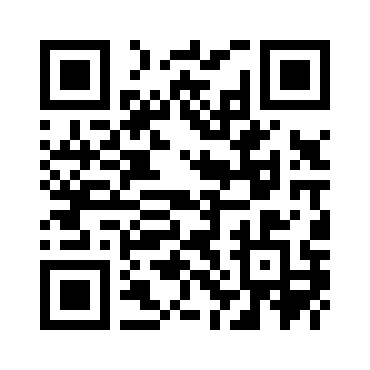

In [9]:
import qrcode

# Link do site
link = "https://35f6ef111fbbf85542.gradio.live"

# Gerar o QR Code
qr = qrcode.make(link)

# Salvar a imagem em um arquivo
qr.save("/content/qrcode.png")

from IPython.display import Image

# Exibir a imagem gerada
Image("/content/qrcode.png")
